# Install necessary libraries

In [ ]:
#Synthetic Data Vault (SDV)
%pip install sdv
#https://pypi.org/project/DataSynthesizer/
#https://github.com/DataResponsibly/DataSynthesizer
%pip install DataSynthesizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 33.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using

# Import libraries and define variables

In [ ]:
import os.path
import pandas as pd
from sdv.metadata import SingleTableMetadata

In [ ]:
#set up variables that we will probably need later and use the capitilization to mark them as constants
FILE_DATA = 'insurance.csv' #this insurance.csv data is from Kaggle at https://www.kaggle.com/datasets/mirichoi0218/insurance
#SDV Library Constants
FILE_SYNTHESIZER_GC = 'synthesizer_gc.pkl'
FILE_SYNTHESIZER_CTGAN = 'synthesizer_ctgan.pkl'
FILE_SYNTHESIZER_CTGAN_TUNE1 = 'synthesizer_ctgan_t1.pkl'
FILE_SYNTHESIZER_CTGAN_TUNE2 = 'synthesizer_ctgan_t2.pkl'
FILE_SYNTHESIZER_GC_OUTPUT = 'syntheticdata_gc.csv'
FILE_SYNTHESIZER_CTGAN_OUTPUT = 'syntheticdata_ctgan.csv'
FILE_SYNTHESIZER_CTGAN_TUNE1_OUTPUT = 'syntheticdata_ctgan_t1.csv'
FILE_SYNTHESIZER_CTGAN_TUNE2_OUTPUT = 'syntheticdata_ctgan_t2.csv'
#DataSynthesizer Library Constants
#FILE_SYNTHESIZER_DS = 'synthesizer_ds.pkl' #the DataSynthesizer library does not appear to have a way to save the model
FILE_SYNTHESIZER_DS_DESCRIPTION = 'description_ds.json'
FILE_SYNTHESIZER_DS_OUTPUT = 'syntheticdata_ds.csv'

In [ ]:
# orig_data as a pandas.core.frame.DataFrame
# metadata as a sdv.metadata.single_table.SingleTableMetadata
if os.path.isfile(FILE_DATA):
  orig_data = pd.read_csv(FILE_DATA)
  #give the df a name that we can use later
  orig_data.name = 'Original'
  #record the row count so that we can pass it to the synthesizers later - this is a good idea, right? 20240713:JC
  orig_data_count = orig_data.shape[0]
else:
  print('The dataset is missing from the environment.  Please upload a file with the name of ' + FILE_DATA)

In [ ]:
#print a quick sampling of what the data looks like
orig_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#convert yes/no into true/false values for the smoker - we are not going to do this, and will leave this as yes/no categorical data
# for i in orig_data.index:
#   if orig_data.loc[i,'smoker'] == 'yes':
#     orig_data.loc[i,'smoker'] = True
#   elif orig_data.loc[i,'smoker'] == 'no':
#     orig_data.loc[i,'smoker'] = False

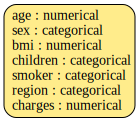

In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(orig_data)
metadata.visualize()

In [ ]:
#the smoker column is still not detected correctly, so fix the metadata field for the smoker - this is also commented out because of the step above
# metadata.update_column(
#     column_name='smoker',
#     sdtype='boolean'
# )
#metadata.visualize()

In [ ]:
#make sure this all validates still
metadata.validate_data(data=orig_data)

# Building the Gaussian Copula Synthesizer

In [ ]:
#generate a data synthesizer using the Gaussian Copula model
from sdv.single_table import GaussianCopulaSynthesizer

if os.path.isfile(FILE_SYNTHESIZER_GC):
  #if the PKL file already exists, import it instead of generating it again
  synthesizer_gc = GaussianCopulaSynthesizer.load(FILE_SYNTHESIZER_GC)
  print('Loaded Gaussian Copula synthesizer from file')
else:
  synthesizer_gc = GaussianCopulaSynthesizer(metadata)
  synthesizer_gc.fit(orig_data)
  #export GC model for use later
  synthesizer_gc.save(FILE_SYNTHESIZER_GC)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
#the distribution here for age explains why there are no 18 year olds in our synthetic dataset
synthesizer_gc.get_learned_distributions()

{'age': {'distribution': 'beta',
  'learned_parameters': {'loc': 18.999999999999996,
   'scale': 45.01146216123719,
   'a': 0.8577693980885819,
   'b': 0.9364092724769204}},
 'sex': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0002571037108111806,
   'scale': 0.9996900324029835,
   'a': 0.9694886526664572,
   'b': 0.9992371645017466}},
 'bmi': {'distribution': 'beta',
  'learned_parameters': {'loc': 10.707122022109395,
   'scale': 60.414188416415676,
   'a': 6.827653386365497,
   'b': 13.843130410516181}},
 'children': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.00031230092689822105,
   'scale': 0.9976520950027166,
   'a': 1.0039058620844323,
   'b': 0.9909518742005726}},
 'smoker': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0007323099551802869,
   'scale': 0.9985999670727843,
   'a': 0.9159376122160503,
   'b': 0.9004214733407847}},
 'region': {'distribution': 'beta',
  'learned_parameters': {'loc': 0.0002152420324680411,
   'scale': 0.9996

In [ ]:
#produce some synthetic data using the GCSynth
synth_data_gc = synthesizer_gc.sample(num_rows=orig_data_count)
#give the df a name that we can use later
synth_data_gc.name = 'SynGC'
#print a quick sampling of what the data looks like
synth_data_gc.head()

,age,sex,bmi,children,smoker,region,charges
0,58,female,33.481,1,no,northeast,26574.767994
1,27,male,20.436,2,no,southeast,6830.612184
2,49,male,27.494,1,no,northwest,3683.320412
3,43,male,28.348,3,no,northeast,9707.982066
4,36,male,33.014,0,no,southwest,20312.436074


In [ ]:
#export synthetic data to csv for analysis in Excel
#synth_data_gc.to_csv('syntheticdata_gc.csv')
#export model for use later
#synthesizer_gc.save(FILE_SYNTHESIZER_GC)

# Building the DataSynthesizer Synthesizer


In [ ]:
#generate a data synthesizer using the DataSynthesizer library
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

#figure out how to describe the data in the proper format
describer = DataDescriber()
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=FILE_DATA, k=2)
describer.save_dataset_description_to_file(FILE_SYNTHESIZER_DS_DESCRIPTION)

# Load the description
#description = read_json_file(FILE_SYNTHESIZER_DS_DESCRIPTION)

# Generate synthetic data
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(orig_data_count, FILE_SYNTHESIZER_DS_DESCRIPTION)

# Save the synthetic data to a file
generator.save_synthetic_data(FILE_SYNTHESIZER_DS_OUTPUT)

# Load and display the synthetic data
synth_data_ds = pd.read_csv(FILE_SYNTHESIZER_DS_OUTPUT)
#give the df a name that we can use later
synth_data_ds.name = 'SynDS'
synth_data_ds.head()

================ Constructing Bayesian Network (BN) ================
Adding ROOT charges
Adding attribute children
Adding attribute smoker
Adding attribute bmi
Adding attribute sex
Adding attribute age
Adding attribute region
========================== BN constructed ==========================


,age,sex,bmi,children,smoker,region,charges
0,59.0,female,49.554560,5,yes,southwest,34730.367071
1,52.0,male,39.582966,0,yes,northwest,44407.486356
2,28.0,female,19.083811,3,yes,southwest,36149.361907
3,28.0,female,24.839532,1,no,northeast,35003.402789
4,44.0,male,41.133221,4,yes,southwest,29161.112665


# Building the CTGAN Synthesizer

In [ ]:
#generate a data synthesizer using the CTGAN model
from sdv.single_table import CTGANSynthesizer

if os.path.isfile(FILE_SYNTHESIZER_CTGAN):
  #if the PKL file already exists, import it instead of generating it again
  synthesizer_ctgan = CTGANSynthesizer.load(FILE_SYNTHESIZER_CTGAN)
  print('Loaded CTGAN synthesizer from file')
else:
  #build CTGAN synth using default parameters (enforce_min_max_values=True,enforce_rounding=True,locales=['en_US'],epochs=300,verbose=False,cuda=True)
  synthesizer_ctgan = CTGANSynthesizer(metadata)
  synthesizer_ctgan.fit(orig_data)
  #export CTGAN model for use later
  synthesizer_ctgan.save(FILE_SYNTHESIZER_CTGAN)

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [ ]:
#generate synthetic data using CTGAN model
synth_data_ctgan = synthesizer_ctgan.sample(num_rows=orig_data_count)
#give the df a name that we can use later
synth_data_ctgan.name = 'SynCTG'
#print a quick sampling of what the data looks like
synth_data_ctgan.head()

,age,sex,bmi,children,smoker,region,charges
0,18,male,40.504,0,no,southwest,53262.686375
1,30,male,43.208,1,yes,northeast,5371.877653
2,18,female,35.606,1,yes,northeast,1896.522040
3,18,female,33.903,1,no,northeast,4215.782961
4,18,male,40.273,2,no,southeast,15207.589980


In [ ]:
#export synthetic data to csv for analysis in Excel
#synth_data_ctgan.to_csv('syntheticdata_ctgan.csv')
#export model for use later
#synthesizer_ctgan.save(FILE_SYNTHESIZER_CTGAN)

## Tuning the CTGAN Model

In [ ]:
#generate a data synthesizer using the CTGAN model and tune it
from sdv.single_table import CTGANSynthesizer

if os.path.isfile(FILE_SYNTHESIZER_CTGAN_TUNE1):
  #if the PKL file already exists, import it instead of generating it again
  synthesizer_ctgan_t1 = CTGANSynthesizer.load(FILE_SYNTHESIZER_CTGAN_TUNE1)
  print('Loaded first tuned CTGAN synthesizer from file')
else:
  #build CTGAN synth using default parameters (enforce_min_max_values=True,enforce_rounding=True,locales=['en_US'],epochs=300,verbose=False,cuda=True)
  synthesizer_ctgan_t1 = CTGANSynthesizer(metadata,epochs=500,verbose=True)
  synthesizer_ctgan_t1.fit(orig_data)
  #export CTGAN model for use later
  synthesizer_ctgan_t1.save(FILE_SYNTHESIZER_CTGAN_TUNE1)

Gen. (-1.09) | Discrim. (0.04): 100%|██████████| 500/500 [00:33<00:00, 14.84it/s]


In [ ]:
fig = synthesizer_ctgan_t1.get_loss_values_plot()
fig.show()

In [ ]:
#generate synthetic data using CTGAN model
synth_data_ctgan_t1 = synthesizer_ctgan_t1.sample(num_rows=orig_data_count)
#give the df a name that we can use later
synth_data_ctgan_t1.name = 'SynCTGt1'
#print a quick sampling of what the data looks like
synth_data_ctgan_t1.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,20.660,0,no,northwest,18211.340969
1,59,male,24.526,1,no,northeast,1121.873900
2,25,female,25.585,3,yes,southeast,54457.849104
3,45,female,36.736,1,no,northeast,5223.392280
4,31,female,22.603,0,no,southeast,31579.184464


In [ ]:
#generate another data synthesizer using the CTGAN model and tune it
from sdv.single_table import CTGANSynthesizer

if os.path.isfile(FILE_SYNTHESIZER_CTGAN_TUNE2):
  #if the PKL file already exists, import it instead of generating it again
  synthesizer_ctgan_t2 = CTGANSynthesizer.load(FILE_SYNTHESIZER_CTGAN_TUNE2)
  print('Loaded second tuned CTGAN synthesizer from file')
else:
  #build CTGAN synth using default parameters (enforce_min_max_values=True,enforce_rounding=True,locales=['en_US'],epochs=300,verbose=False,cuda=True,batch_size=500)
  synthesizer_ctgan_t2 = CTGANSynthesizer(metadata,epochs=300,batch_size=100,verbose=True)
  synthesizer_ctgan_t2.fit(orig_data)
  #TODO: export CTGAN model for use later - this has been commented so that we can easily regen this for testing
  #synthesizer_ctgan_t2.save(FILE_SYNTHESIZER_CTGAN_TUNE2)

In [ ]:
fig = synthesizer_ctgan_t2.get_loss_values_plot()
fig.show()

In [ ]:
#generate synthetic data using CTGAN model
synth_data_ctgan_t2 = synthesizer_ctgan_t2.sample(num_rows=orig_data_count)
#give the df a name that we can use later
synth_data_ctgan_t2.name = 'SynCTGt2'
#print a quick sampling of what the data looks like
synth_data_ctgan_t2.head()

,age,sex,bmi,children,smoker,region,charges
0,32,female,31.978,0,no,southeast,19622.512993
1,54,male,26.693,0,yes,northeast,9828.190281
2,28,male,34.609,2,yes,northeast,45989.183308
3,44,female,29.631,1,no,northwest,7515.788947
4,35,female,33.794,0,no,northeast,5617.825036


# Trying to prove the effectiveness of the models graphically

In [ ]:
#set up variables on what is to be plotted in these graphs
#we have named the dataframes when they are generated so we should not need to specify their names in a hashtable here anymore
#datasets_to_plot = [orig_data,synth_data_gc,synth_data_ctgan,synth_data_ds]
#datasets_to_plot_hexbin = [orig_data,synth_data_gc,synth_data_ctgan,synth_data_ds] #must be exactly 4

#specify datasets for CTGAN tuning
datasets_to_plot = [orig_data,synth_data_ctgan,synth_data_ctgan_t1,synth_data_ctgan_t2]
datasets_to_plot_hexbin = [orig_data,synth_data_ctgan,synth_data_ctgan_t1,synth_data_ctgan_t2] #must be exactly 4

#plot all datasets
datasets_to_plot = [orig_data,synth_data_gc,synth_data_ctgan,synth_data_ds,synth_data_ctgan_t1,synth_data_ctgan_t2]

#dir(orig_data) #similar to powershell get-member

## Age

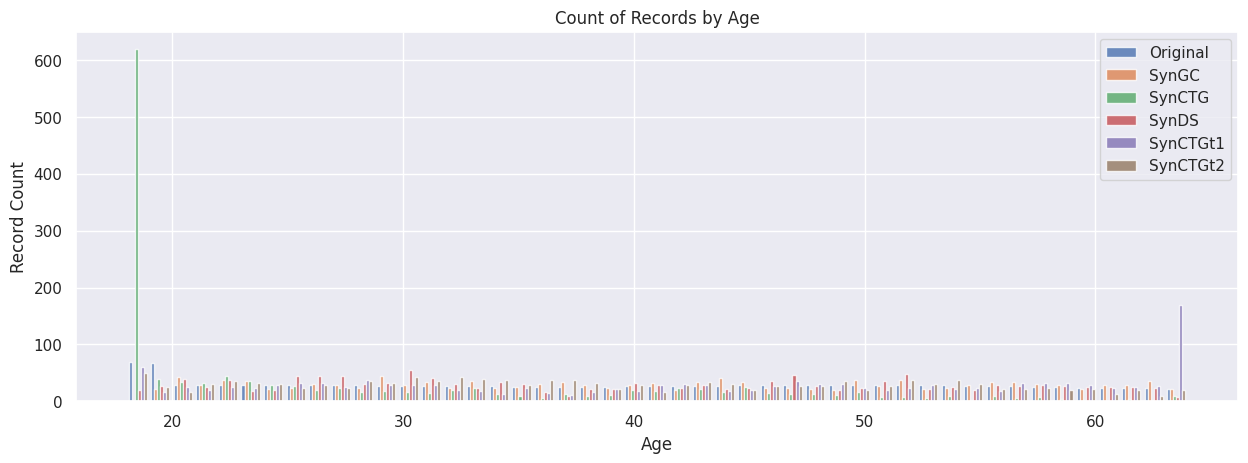

In [ ]:
#plot histogram of ages between datasets
from matplotlib import pyplot as plt
#from scipy.stats import norm
bins = orig_data.age.nunique()
plt.figure().set_figwidth(15)
plt.title('Count of Records by Age')
plt.xlabel('Age')
plt.ylabel('Record Count')
# synth_data_gc['age'].plot(kind='hist', bins=bins, title='Age Distribution')
# plt.hist(orig_data.age, bins, alpha=0.5, label='Original')
# plt.hist(synth_data_gc.age, bins, alpha=0.5, label='Synthetic')
#this one works, but we are testing the new plotting method using datasets_to_plot
#plt.hist([orig_data.age,synth_data_gc.age,synth_data_ctgan.age,synth_data_ds.age], bins, alpha=0.8, label=['Original','SynGC','SynCTG','SynDS'],histtype='barstacked')
attrib = 'age'
d = []
l = []
for dstp in datasets_to_plot:
  d.append(dstp.get(attrib))
  l.append(dstp.name)
plt.hist(d, bins, alpha=0.8, label=l,histtype='bar')
plt.legend(loc='upper right')
plt.show()
#plt.gca().spines[['top', 'right',]].set_visible(False)

## BMI

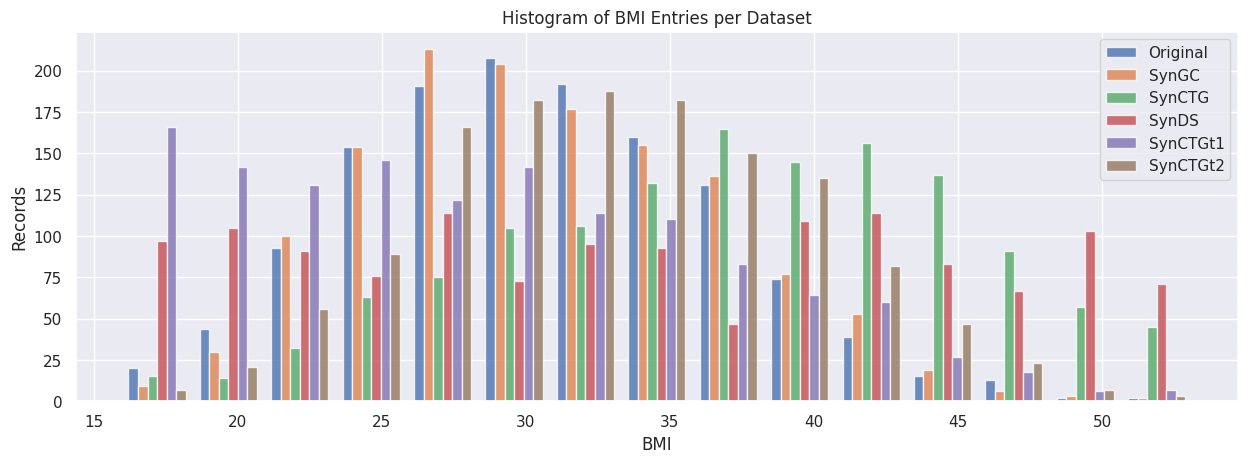

In [ ]:
#plot BMI comparison between datasets
plt.figure().set_figwidth(15)
plt.title('Histogram of BMI Entries per Dataset')
plt.xlabel('BMI')
plt.ylabel('Records')
#plt.hist([orig_data.bmi,synth_data_gc.bmi,synth_data_ctgan.bmi,synth_data_ds.bmi], 15, alpha=0.8, label=['Original','SynGC','SynCTG','SynDS'])
attrib = 'bmi'
d = []
l = []
for dstp in datasets_to_plot:
  d.append(dstp.get(attrib))
  l.append(dstp.name)
plt.hist(d, 15, alpha=0.8, label=l)
plt.legend(loc='upper right')
plt.show()

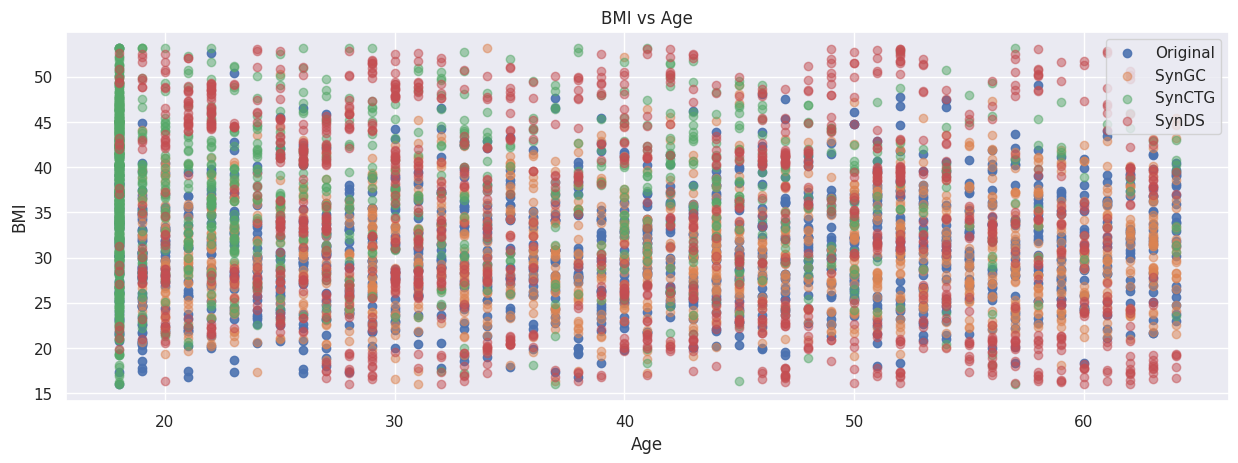

In [ ]:
#plot BMI vs Age comparisons between datasets as a y vs x scatterplot (assuming there would be a correlation between age and bmi)
plt.figure().set_figwidth(15)
plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.scatter(orig_data.age,orig_data.bmi,alpha=0.9,label='Original')
plt.scatter(synth_data_gc.age,synth_data_gc.bmi,alpha=0.5,label='SynGC')
plt.scatter(synth_data_ctgan.age,synth_data_ctgan.bmi,alpha=0.5,label='SynCTG')
plt.scatter(synth_data_ds.age,synth_data_ds.bmi,alpha=0.5,label='SynDS')
plt.legend(loc='upper right')
plt.show()

## Children

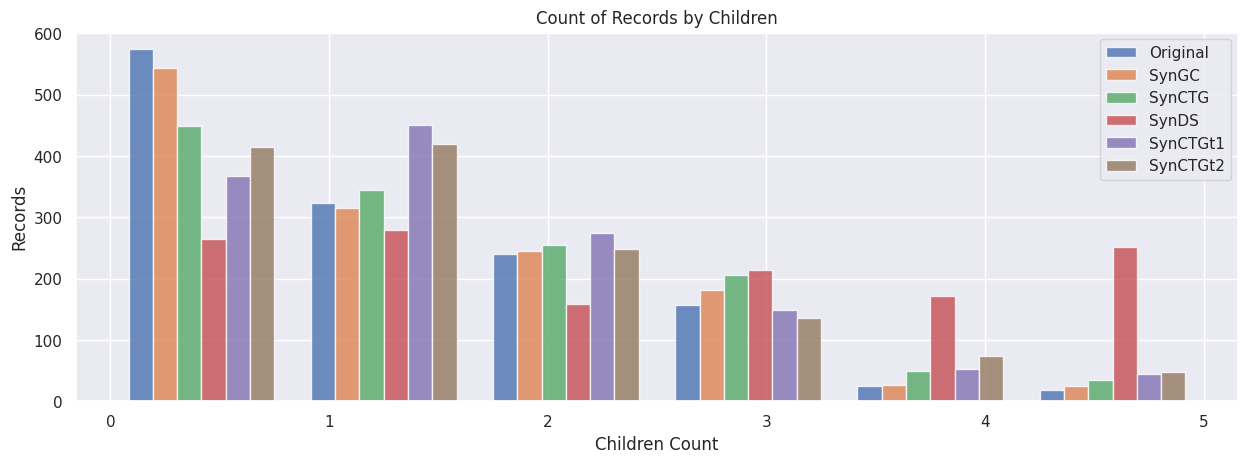

In [ ]:
#plot children histogram for datasets
bins = orig_data.children.nunique()
plt.figure().set_figwidth(15)
plt.title('Count of Records by Children')
plt.xlabel('Children Count')
plt.ylabel('Records')
#plt.hist([orig_data.children,synth_data_gc.children,synth_data_ctgan.children,synth_data_ds.children], bins, alpha=0.8, label=['Original','SynGC','SynCTG','SynDS'])
attrib = 'children'
d = []
l = []
for dstp in datasets_to_plot:
  d.append(dstp.get(attrib))
  l.append(dstp.name)
plt.hist(d, bins, alpha=0.8, label=l)
plt.legend(loc='upper right')
plt.show()

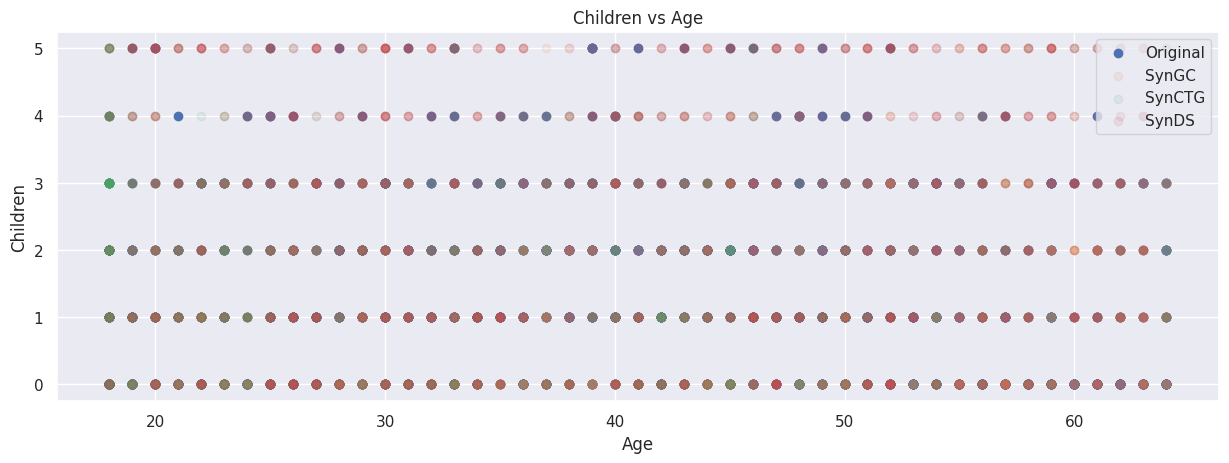

In [ ]:
#plot children vs age comparisons between datasets as a y vs x scatterplot (assuming there would be a correlation between age and children)
#TODO: this graph does not communicate the problems with the synthesizers very well.  this needs to be reconsidered - 20240713:JC
plt.figure().set_figwidth(15)
plt.title('Children vs Age')
plt.xlabel('Age')
plt.ylabel('Children')
plt.scatter(orig_data.age,orig_data.children,alpha=1,label='Original')
plt.scatter(synth_data_gc.age,synth_data_gc.children,alpha=0.1,label='SynGC')
plt.scatter(synth_data_ctgan.age,synth_data_ctgan.children,alpha=0.1,label='SynCTG')
plt.scatter(synth_data_ds.age,synth_data_ds.children,alpha=0.1,label='SynDS')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# generate box plots to prove the age thing
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=orig_data,
    synthetic_data=synth_data_ctgan,
    column_names=['age', 'children'],
    metadata=metadata
)

fig.show()

fig = get_column_pair_plot(
    real_data=orig_data,
    synthetic_data=synth_data_ctgan,
    column_names=['children', 'age'],
    metadata=metadata
)

fig.show()

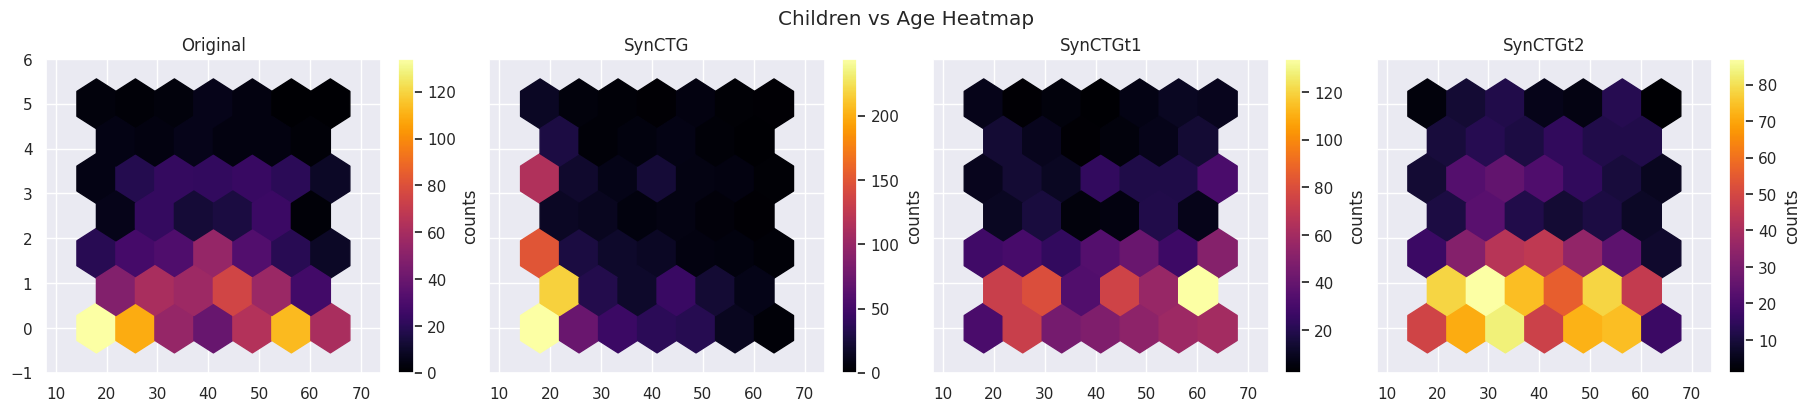

In [ ]:
#plot a heatmap of children vs age using hexagonal binning - this doesn't produce great results
#xlim = orig_data.age.min(), orig_data.age.max()
xlim = orig_data.age.min() - 10, orig_data.age.max() + 10
ylim = orig_data.children.min() - 1, orig_data.children.max() + 1

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(18, 4),layout='constrained')

hb = ax0.hexbin(orig_data.age, orig_data.children, gridsize=6, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Original")
cb = fig.colorbar(hb, ax=ax0, label='counts')

#hb = ax1.hexbin(synth_data_gc.age, synth_data_gc.children, gridsize=6, cmap='inferno')
hb = ax1.hexbin(datasets_to_plot_hexbin[1].age, datasets_to_plot_hexbin[1].children, gridsize=6, cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
#ax1.set_title("GC")
ax1.set_title(datasets_to_plot_hexbin[1].name)
cb = fig.colorbar(hb, ax=ax1, label='counts')

#hb = ax2.hexbin(synth_data_ctgan.age, synth_data_ctgan.children, gridsize=6, cmap='inferno')
hb = ax2.hexbin(datasets_to_plot_hexbin[2].age, datasets_to_plot_hexbin[2].children, gridsize=6, cmap='inferno')
ax2.set(xlim=xlim, ylim=ylim)
#ax2.set_title("CTGAN")
ax2.set_title(datasets_to_plot_hexbin[2].name)
cb = fig.colorbar(hb, ax=ax2, label='counts')

#hb = ax3.hexbin(synth_data_ds.age, synth_data_ds.children, gridsize=6, cmap='inferno')
hb = ax3.hexbin(datasets_to_plot_hexbin[3].age, datasets_to_plot_hexbin[3].children, gridsize=6, cmap='inferno')
ax3.set(xlim=xlim, ylim=ylim)
#ax3.set_title("DS")
ax3.set_title(datasets_to_plot_hexbin[3].name)
cb = fig.colorbar(hb, ax=ax3, label='counts')

fig.suptitle('Children vs Age Heatmap')
plt.show()

## Charges

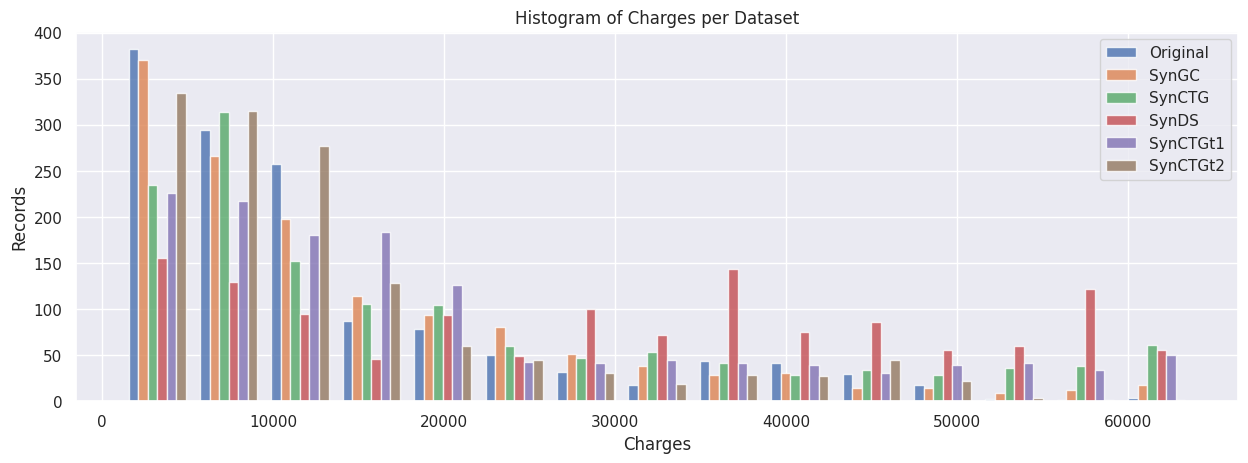

In [ ]:
#plot charges comparison between datasets
plt.figure().set_figwidth(15)
plt.title('Histogram of Charges per Dataset')
plt.xlabel('Charges')
plt.ylabel('Records')
#plt.hist([orig_data.charges,synth_data_gc.charges,synth_data_ctgan.charges,synth_data_ds.charges], 15, alpha=0.8, label=['Original','SynGC','SynCTG','SynDS'])
attrib = 'charges'
d = []
l = []
for dstp in datasets_to_plot:
  d.append(dstp.get(attrib))
  l.append(dstp.name)
plt.hist(d, 15, alpha=0.8, label=l)
plt.legend(loc='upper right')
plt.show()

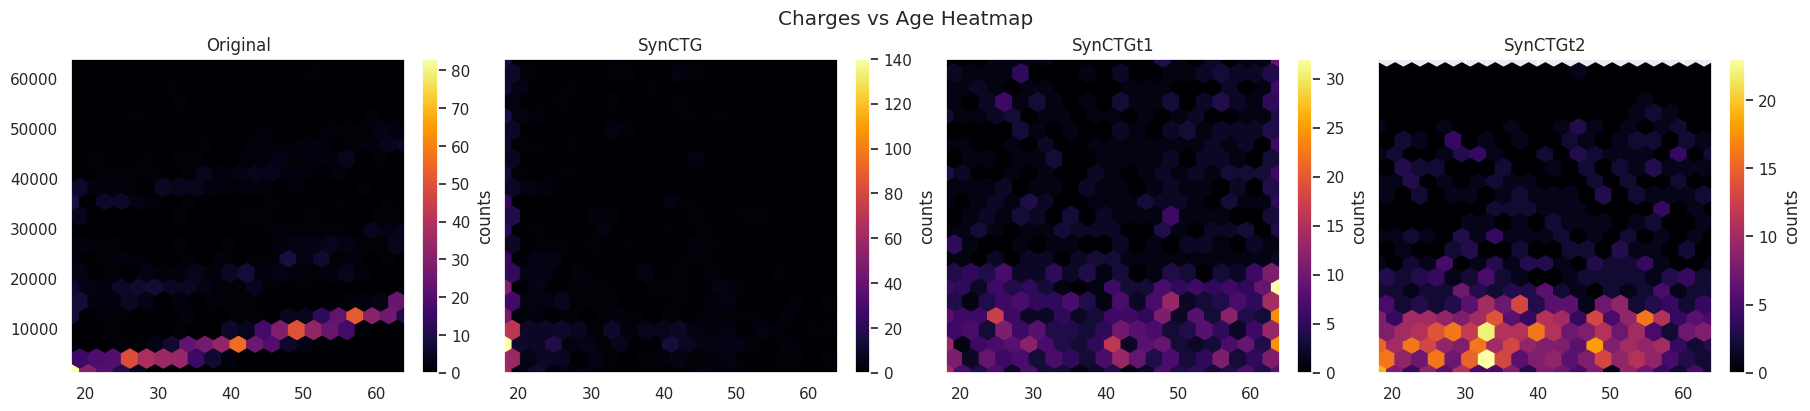

In [ ]:
#plot a heatmap of charges vs age using hexagonal binning
xlim = orig_data.age.min(), orig_data.age.max()
ylim = orig_data.charges.min(), orig_data.charges.max()

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(18, 4),layout='constrained')

hb = ax0.hexbin(orig_data.age, orig_data.charges, gridsize=20, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Original")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(datasets_to_plot_hexbin[1].age, datasets_to_plot_hexbin[1].charges, gridsize=20, cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title(datasets_to_plot_hexbin[1].name)
cb = fig.colorbar(hb, ax=ax1, label='counts')

hb = ax2.hexbin(datasets_to_plot_hexbin[2].age, datasets_to_plot_hexbin[2].charges, gridsize=20, cmap='inferno')
ax2.set(xlim=xlim, ylim=ylim)
ax2.set_title(datasets_to_plot_hexbin[2].name)
cb = fig.colorbar(hb, ax=ax2, label='counts')

hb = ax3.hexbin(datasets_to_plot_hexbin[3].age, datasets_to_plot_hexbin[3].charges, gridsize=20, cmap='inferno')
ax3.set(xlim=xlim, ylim=ylim)
ax3.set_title(datasets_to_plot_hexbin[3].name)
cb = fig.colorbar(hb, ax=ax3, label='counts')

plt.suptitle('Charges vs Age Heatmap')
plt.show()

In [ ]:
#do the same thing for the DS data
fig = get_column_pair_plot(
    real_data=orig_data,
    synthetic_data=synth_data_ds,
    column_names=['age', 'children'],
    metadata=metadata
)

fig.show()

fig = get_column_pair_plot(
    real_data=orig_data,
    synthetic_data=synth_data_ds,
    column_names=['children', 'age'],
    metadata=metadata
)

fig.show()

## Smokers

In [ ]:
#plot "histogram" of smoker categories between datasets
# plt.figure().set_figwidth(15)
# plt.title('Smokers')
# plt.hist([orig_data.smoker,synth_data_gc.smoker,synth_data_ctgan.smoker,synth_data_ds.smoker], 2, alpha=0.8, label=['Original','SynGC','SynCTG','SynDS'])
# plt.legend(loc='upper right')
# plt.show()

#insane code to make a stacked bar chart work in pyplot. I don't know why this isn't more readily available in these graphical libraries
#references:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
# https://stackoverflow.com/questions/67311558/histogram-of-a-categorical-variable-with-matplotlib
# https://stackoverflow.com/questions/33907776/create-an-array-of-dataframes-in-python
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.get.html
categories = orig_data.smoker.value_counts().index
#df_collection = {'orig_data':orig_data,'synth_data_gc':synth_data_gc,'synth_data_ctgan':synth_data_ctgan,'synth_data_ds':synth_data_ds}

#series = df_collection.keys()
series_labels = []
#series2 = {'yes':[],'no':[]}
series3 = []

# for datasetname in df_collection.keys():
#   s = df_collection[datasetname].smoker.value_counts()
#   s.name = datasetname
#   series3.append(s)

for dstp in datasets_to_plot:
  s = dstp.smoker.value_counts()
  s.name = dstp.name
  series_labels.append(dstp.name)
  series3.append(s)

print(series3)

[smoker
no     1064
yes     274
Name: Original, dtype: int64, smoker
no     1022
yes     316
Name: SynGC, dtype: int64, smoker
no     906
yes    432
Name: SynCTG, dtype: int64, smoker
no     735
yes    603
Name: SynDS, dtype: int64, smoker
no     1002
yes     336
Name: SynCTGt1, dtype: int64, smoker
no     985
yes    353
Name: SynCTGt2, dtype: int64]


In [ ]:
series_counts = {}
for category in categories: #iterate through the categories first (i.e draw all of the "no"s at the bottom)
  series_counts[category] = []
  for s in series3:
    series_counts[category].append(s[category])

series_counts

{'no': [1064, 1022, 906, 735, 1002, 985],
 'yes': [274, 316, 432, 603, 336, 353]}

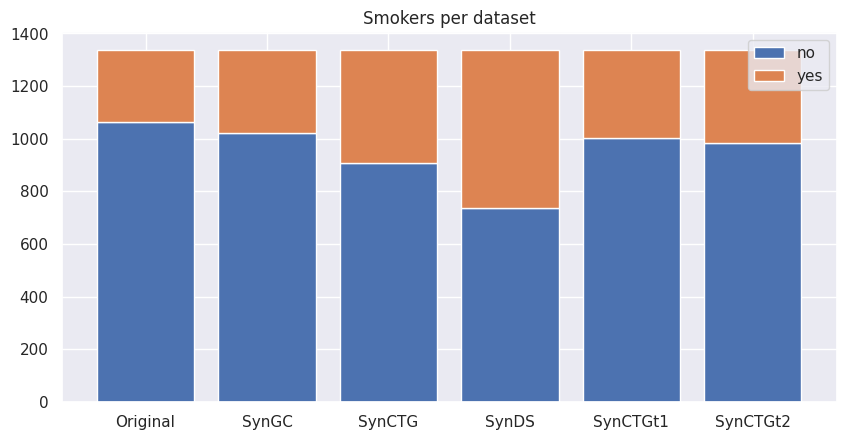

In [ ]:
import numpy as np

width = 0.8
fig, ax = plt.subplots()
fig.set_figwidth(10)
bottom = np.zeros(len(series_labels))

for label, count in series_counts.items():
    p = ax.bar(series_labels, count, width, label=label, bottom=bottom)
    bottom += count

ax.set_title("Smokers per dataset")
ax.legend(loc="upper right")

plt.show()

# Trying to prove the effectiveness of the models graphically - Take 2

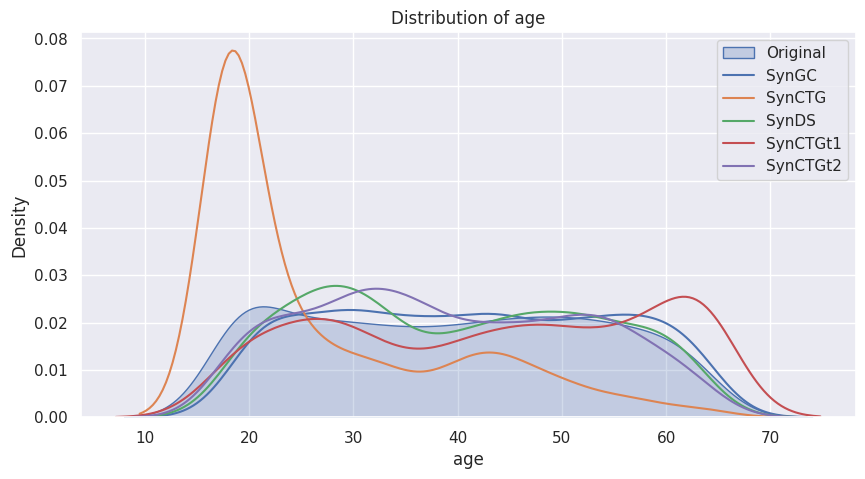

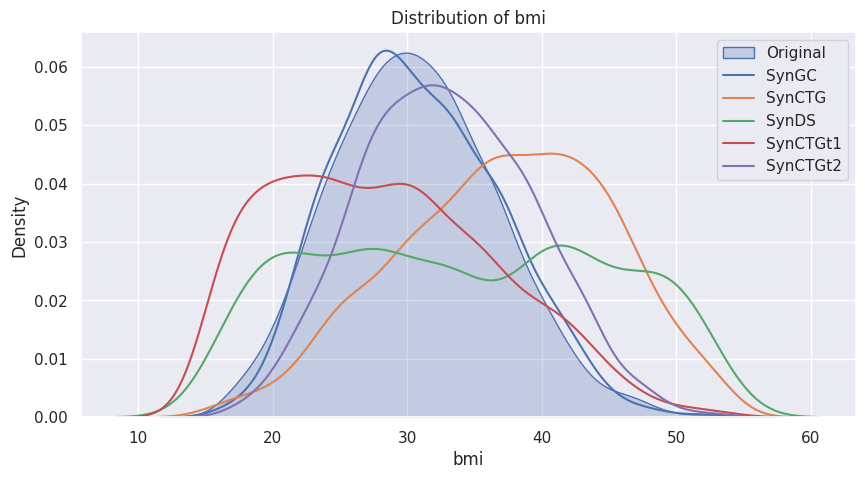

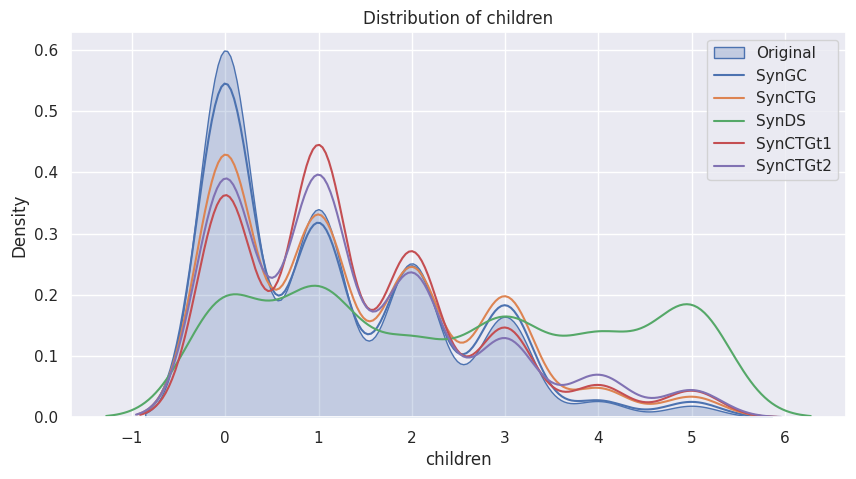

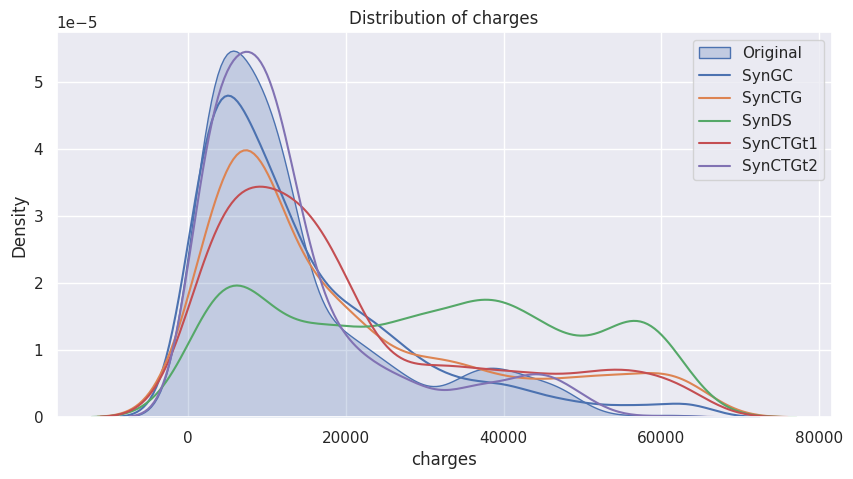

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare the distribution of numerical columns
for column in orig_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    for dstp in datasets_to_plot:
      fill = dstp.name == 'Original'
      sns.kdeplot(dstp[column], label=dstp.name, fill=fill)
    #sns.kdeplot(orig_data[column], label='Original', fill=True)
    #sns.kdeplot(synth_data_gc[column], label='SynGC', fill=True)
    #sns.kdeplot(synth_data_ctgan[column], label='SynCTG', fill=True)
    #sns.kdeplot(synth_data_ds[column], label='SynDS', fill=True)
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

#this categorical stuff works terribly, so I am commenting it out in favor of using the stacked bar charts using pyplot - 20240713:JC
# # Compare categorical columns
# categorical_columns = ['sex', 'smoker', 'region']
# for column in categorical_columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=orig_data, x=column, label='Original', alpha=0.9)
#     sns.countplot(data=synth_data_gc, x=column, label='SynGC', alpha=0.9)
#     #sns.countplot(data=synth_data_ctgan, x=column, label='SynCTG', alpha=0.9)
#     #sns.countplot(data=synth_data_ds, x=column, label='SynDS', alpha=0.9)
#     plt.title(f'Distribution of {column}')
#     plt.legend()
#     plt.show()

# Trying to prove the effectiveness of the models with other functions

In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = {}
for dstp in datasets_to_plot[1:]:
  print(dstp.name)
  diagnostic[dstp.name] = run_diagnostic(
      real_data=orig_data,
      synthetic_data=dstp,
      metadata=metadata
  )

SynGC
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 712.43it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 222.56it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

SynCTG
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 674.64it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 330.18it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

SynDS
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 626.95it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 325.75it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

SynCTGt1
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 7/7 [00:00<00:00, 627.97it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████

In [ ]:
#evaluate data quality for all models
from sdv.evaluation.single_table import evaluate_quality

quality_report = {}
for dstp in datasets_to_plot[1:]:
  print(dstp.name)
  quality_report[dstp.name] = evaluate_quality(
      orig_data,
      dstp,
      metadata
  )

SynGC
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 578.03it/s]|
Column Shapes Score: 96.05%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 50.17it/s]|
Column Pair Trends Score: 91.18%

Overall Score (Average): 93.61%

SynCTG
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 601.40it/s]|
Column Shapes Score: 80.47%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 49.96it/s]|
Column Pair Trends Score: 74.02%

Overall Score (Average): 77.25%

SynDS
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 513.50it/s]|
Column Shapes Score: 78.61%

(2/2) Evaluating Column Pair Trends: |██████████| 21/21 [00:00<00:00, 46.54it/s]|
Column Pair Trends Score: 68.05%

Overall Score (Average): 73.33%

SynCTGt1
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 7/7 [00:00<00:00, 575.08it/s]|
Column Shapes Score: 84.45%

(2/2) Evaluat

## Verify Column Shapes

In [ ]:
for dstp in datasets_to_plot[1:]:
  print(dstp.name)
  print(quality_report[dstp.name].get_details('Column Shapes'))
  #print(quality_report[dstp.name].get_details('Column Pair Trends'))

SynGC
     Column        Metric     Score
0       age  KSComplement  0.914051
1       sex  TVComplement  0.992526
2       bmi  KSComplement  0.974589
3  children  TVComplement  0.970852
4    smoker  TVComplement  0.968610
5    region  TVComplement  0.987294
6   charges  KSComplement  0.915546
SynCTG
     Column        Metric     Score
0       age  KSComplement  0.585202
1       sex  TVComplement  0.905830
2       bmi  KSComplement  0.606876
3  children  TVComplement  0.906577
4    smoker  TVComplement  0.881913
5    region  TVComplement  0.934978
6   charges  KSComplement  0.811659
SynDS
     Column        Metric     Score
0       age  KSComplement  0.931241
1       sex  TVComplement  0.982063
2       bmi  KSComplement  0.695067
3  children  TVComplement  0.674141
4    smoker  TVComplement  0.754111
5    region  TVComplement  0.928251
6   charges  KSComplement  0.538117
SynCTGt1
     Column        Metric     Score
0       age  KSComplement  0.866218
1       sex  TVComplement  0.874439


In [ ]:
#plot the quality report for column shapes to be able to more easily understand the data
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for dstp in datasets_to_plot[1:]:
  categories = quality_report[dstp.name].get_details('Column Shapes').Column.values
  fig.add_trace(go.Scatterpolar(r=quality_report[dstp.name].get_details('Column Shapes').Score.values,theta=categories,name=dstp.name))
#fig = px.line_polar(quality_report['SynCTG'].get_details('Column Shapes'),r='Score',theta='Column',line_close=True)
fig.update_layout(autosize=False,width=500,title='Column Shapes')
fig.show()

## Verify Column Pair Trends

In [ ]:
#construct category list for column pairs based on the first quality report
# categories = []
# df = quality_report[next(iter(quality_report))].get_details('Column Pair Trends')
# #find only the column pairs where there is a correlation in the original dataset
# df = df[df['Real Correlation'].isna() != True]
# for i, row in df.iterrows():
#   categories.append(row['Column 1'] + '+' + row['Column 2'])

for dstp in datasets_to_plot[1:]:
  print(dstp.name)
  df = quality_report[dstp.name].get_details('Column Pair Trends')
  #find only the column pairs where there is a correlation in the original dataset
  df = df[df['Real Correlation'].isna() != True]
  print(df)

SynGC
   Column 1 Column 2                 Metric     Score  Real Correlation  \
1       age      bmi  CorrelationSimilarity  0.954474          0.109272   
5       age  charges  CorrelationSimilarity  0.938048          0.299008   
14      bmi  charges  CorrelationSimilarity  0.959588          0.198341   

    Synthetic Correlation  
1                0.018219  
5                0.422913  
14               0.117517  
SynCTG
   Column 1 Column 2                 Metric     Score  Real Correlation  \
1       age      bmi  CorrelationSimilarity  0.935219          0.109272   
5       age  charges  CorrelationSimilarity  0.866401          0.299008   
14      bmi  charges  CorrelationSimilarity  0.898703          0.198341   

    Synthetic Correlation  
1               -0.020289  
5                0.031809  
14              -0.004252  
SynDS
   Column 1 Column 2                 Metric     Score  Real Correlation  \
1       age      bmi  CorrelationSimilarity  0.855114          0.109272   
5    

In [ ]:
#plot the quality report for column pair trends to be able to more easily understand the data
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
for dstp in datasets_to_plot[1:]:
  categories = []
  df = quality_report[dstp.name].get_details('Column Pair Trends')
  df = df[df['Real Correlation'].isna() != True]
  for i, row in df.iterrows():
    categories.append(row['Column 1'] + '+' + row['Column 2'])
  fig.add_trace(go.Scatterpolar(r=df.Score.values,theta=categories,name=dstp.name))
fig.update_layout(autosize=False,width=500,title='Column Pair Trends')
fig.show()